<a href="https://colab.research.google.com/github/anferivera/Metodos_Computacionales/blob/main/7_1_differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential Equations

Based in Diego Restrepo y Sebastian Bustamante notebooks. https://github.com/restrepo/ComputationalMethods

Differential equations is without doubt one of the more useful branch of mathematics in science. They are used to model problems involving the change of some variable with respect to another. Differential equations cover a wide range of different applications, ranging from ordinary differential equations (ODE) until boundary-value problems involving many variables. For the sake of simplicity, throughout this section we shall cover only ODE systems as they are more elemental and equally useful. First, we shall cover first order methods, then second order methods and finally, system of differential equations.

- - -
- [First Order Methods](#First-Order-Methods)
    - [Euler's method](#Euler's-method)
    - [Example 1](#Example-1)
- [High Order Methods](#High-Order-Methods)
    - [Second-order Runge-Kutta methods](#Second-order-Runge-Kutta-methods)
    - [Example 2](#Example-2)
    - [Fourth-order Runge-Kutta method](#Fourth-order-Runge-Kutta-method)
- [Two-Point Boundary Value Problems](#Two-Point-Boundary-Value-Problems)
    - [Example 3](#Example-3)

- - -

In [ ]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


- - -

#First Order Methods

Ordinary differential equations normally implies the solution of an initial-value problem, i.e., the solution has to satisfy the differential equation together with some initial condition. Real-life problems usually imply very complicated problems and even non-soluble ones, making any analytical approximation unfeasible. Fortunately, there are two ways to handle this. First, for almost every situation, it is generally posible to simplify the original problem and obtain a simpler one that can be easily solved. Then, using perturbation theory, we can perturbate this solution in order to approximate the real one. This approach is useful, however, it depends very much on the specific problem and a systematic study is rather complicated.

The second approximation, and the one used here, consists of a complete numerical reduction of the problem, solving it exactly within the accuracy allowed by implicit errors of the methods. For this part, we are going to assume well-defined problems, where solutions are expected to be well-behaved.

##Euler's method

This method is the most basic of all methods, however, it is useful to understand basic concepts and definitions of differential equations problems.

Suppose we have a well-posed initial-value problem given by:

$$ \frac{dy}{dt}=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

Now, let's define a **mesh points** as a set of values $\{t_i\}t_i$ where we are going to approximate the solution $y(t)$. These points can be equal-spaced such that

$$ t_i = a+ i h,\ \ \ \ \mbox{with}\ \ i=1,2,3,\cdots,N \ \ \mbox{and}\ h = \frac{b-a}{N}. $$

Here, $h$ is called the **step size** of the **mesh points**.

Now, using the first-order approximation of the derivative saw in [Numerical Differentiation](http://nbviewer.ipython.org/github/sbustamante/ComputationalMethods/blob/master/material/numerical-calculus.ipynb#Numerical-Differentiation), we obtain

$$ \frac{dy}{dt}\approx \frac{y(t+h)-y(t)}{h} $$

or

$$ \left.\frac{dy}{dt}\right|_{t=t_i}\approx \frac{y(t_{i+1})-y(t_i)}{h} $$

The original problem can be rewritten as

$$ y_{i+1} = y_i + hf(t_i, y_i) + \frac{h^2}{2}y^{''}(\xi_i) $$

where the notation $y(t_i)\equiv y_i$ has been introduced and the last term (error term) can be obtained taking a second-order approximation of the derivative.

This equation can be solved recursively as we know the initial value $y_0 = y(a) = \alpha$.

#Example 0:

Let's consider the next E.D.O.

$dy/dt=f(t,y)=2 t (y-1)$ with $y(0)=3$ in $0 \le t\le 2$.

Find y(t) numerically.



In [ ]:
# Known solution... at little trick!
def y(t):
  return 2*np.exp(t**2)+1

In [ ]:
def f(t,y):

  return 2*t*(y-1)

In [ ]:
#range of t value
a = 0
b = 3
N = 100 #number of intervals

tiempos = np.linspace(a,b,N)

h = (b-a)/N #step

In [ ]:
yi = [3.0,] #Initial value

for i in range(0,len(tiempos)-1):

  yi1 = yi[i] + h*f(tiempos[i],yi[i])

  yi.append(yi1)

Text(0, 0.5, 'y')

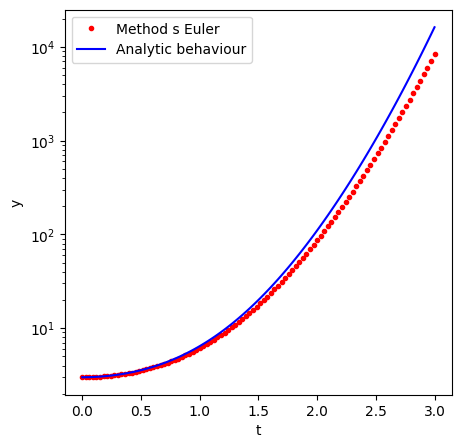

In [ ]:
plt.figure(figsize=(5, 5))
plt.semilogy(tiempos,yi,'r.',label='Method s Euler')
plt.legend()

plt.plot(tiempos, y(tiempos),'b-',label='Analytic behaviour')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')


##Example 1

The formalism of the Euler's method can be applied for any system of the form:

$$ \frac{dy}{dt}=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

However, it is possible to extend this to second-order systems, i.e., systems involving second derivatives. Let's suppose a general system of the form:

$$ \frac{d^2y}{dt^2}+ g(t,y)\frac{dy}{dt}=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ y'(a) = \beta$$

For this system we have to provide both, the initial value $y(a)$ and the initial derivative $y'(a)$.

Now, let's define a new variable $w(t) = y'(t)$, the previous problem can be then written as

$$ \matrix{\frac{dw}{dt}=-g(t,y)w+f(t,y) \\  \frac{dy}{dt}=w(t)} ,\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ w(a) = \beta$$

Each of this problem has now the form required by the Euler's algorithm, and the solution can be computed as:

$$ \matrix{w_{i+1}= w_{i} - h[g(t_i,y_i)w_i-f(t_i,y_i)] \\  y_{i+1}=y_i + hw_i} ,\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ w(a) = \beta$$

- - -

In order to apply this, let's assume a simple mass-spring.

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/material/figures/mass_spring.png)

The equation of motion according to Newton's second law is

$$ m\frac{d^2x}{dt^2} = -kx $$

Using the previous results, we can rewrite this as:

$$ \frac{dv}{dt} = -\frac{k}{m}x $$
$$ \frac{dx}{dt} = v $$

And the equivalent Euler system is

$$ \matrix{v_{i+1}= v_{i} - h\frac{k}{m}x_i \\  x_{i+1}=x_i + hv_i} ,\ \ \ x(0) = x_0\ \ \mbox{and}\ v(0) = v_0$$

 - - -
 <font color='red'>   **Example 1:** </font> Mass-spring system (M.A.S.)

**1.** Consider the initial conditions $x(0) = 3$ cm and $v(0) = 0$ m/s con $k=100$ N/m y $m=1$ kg.

The solution to the Newton's second law is given by:

$x = A\,\cos(\omega\,t)$ and $v = -A\omega \sin(\omega\,t)$ with $\omega = \sqrt(k/m)$.

The period of the moviment is given by $p = 2\pi/\omega$.

- - -

Frecuencia natural w = 10.0 (rad/s)
p = 0.63 (s)


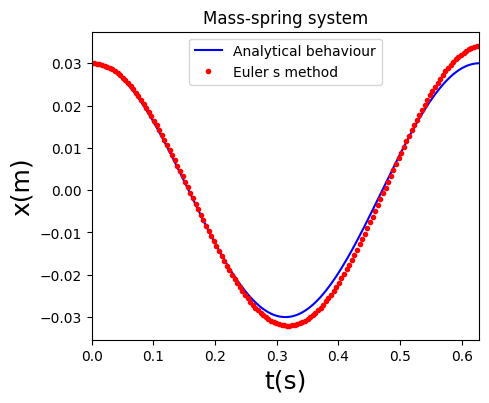

In [ ]:
#Example: Mass-string system.
A,k,m = 0.03,100,1
w = np.sqrt(k/m)
p = 2*np.pi/w
print('Frecuencia natural w =',w,'(rad/s)')
print('p =',np.round(2*np.pi/w,2),'(s)')

#Euler's Algoritmo
N = 150
t = np.linspace(0,p,N)
h = p/N

x0, v0 = A, 0

x = [x0,]
v = [v0,]
for i in range(0,len(t)-1):
    x.append( x[i] + h*v[i] )
    v.append( v[i] - h*w**2*x[i] )

plt.figure( figsize = (5,4) )
plt.plot(t, A*np.cos(w*t),'b-',label='Analytical behaviour')
plt.plot(t, x,'r.',label='Euler s method')
plt.legend(loc='best')
plt.title( "Mass-spring system" )
plt.xlabel( "t(s)", fontsize = 18 )
plt.ylabel( "x(m)", fontsize = 18 )
#plt.grid(1)
plt.xlim(0,p)
plt.show()

 <font color='red'>   **Activity 1:** </font>

Using the initial conditions $x(0) = 0$ cm and $v(0) = 3$ m/s, solve the mass-spring system con $k=100$ N/m y $m=1$ kg.

*  Plot the solutions $x(t)$ and compare with real solutions.

* Furthermore, calculate the total energy of the system. Plot E vs t. What can you conclude about the behaviour of the energy? Does it make any sense?
- - -

Frecuencia natural w = 10.0 (rad/s)
Period p = 0.63 (s)


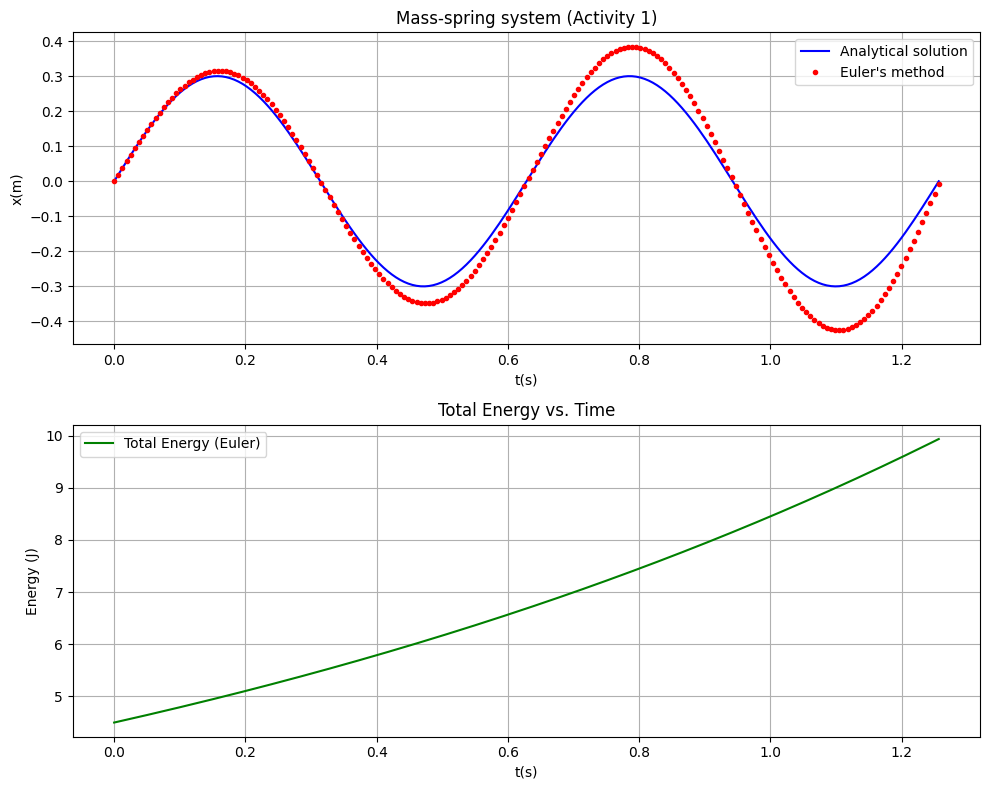

In [ ]:
# Activity 1: Mass-spring system with x(0) = 0 and v(0) = 3 m/s

# Given parameters
k = 100 # N/m
m = 1   # kg

# Initial conditions
x0 = 0.0  # m (converted from cm if necessary, but problem states cm and then m/s, assuming x0 in m)
v0 = 3.0  # m/s

w = np.sqrt(k/m)
p = 2*np.pi/w

print('Frecuencia natural w =',w,'(rad/s)')
print('Period p =',np.round(p,2),'(s)')

# Euler's Algorithm
N = 200
t = np.linspace(0, 2*p, N) # Integrate for a couple of periods to observe energy behavior
h = t[1] - t[0]

x_euler = [x0,]
v_euler = [v0,]

for i in range(0,len(t)-1):
    x_next = x_euler[i] + h*v_euler[i]
    v_next = v_euler[i] - h*w**2*x_euler[i]
    x_euler.append( x_next )
    v_euler.append( v_next )

# Analytical solution for x(0)=0, v(0)=v0
x_analytical = (v0/w) * np.sin(w*t)
v_analytical = v0 * np.cos(w*t)

# Calculate total energy E = 0.5 * m * v^2 + 0.5 * k * x^2
energy = 0.5 * m * np.array(v_euler)**2 + 0.5 * k * np.array(x_euler)**2

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1) # Two subplots, 2 rows, 1 column, first plot
plt.plot(t, x_analytical, 'b-', label='Analytical solution')
plt.plot(t, x_euler, 'r.', label='Euler\'s method')
plt.legend(loc='best')
plt.title("Mass-spring system (Activity 1)")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.grid(True)

plt.subplot(2, 1, 2) # Second plot
plt.plot(t, energy, 'g-', label='Total Energy (Euler)')
plt.legend(loc='best')
plt.xlabel("t(s)")
plt.ylabel("Energy (J)")
plt.title("Total Energy vs. Time")
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

 <font color='red'>   **Activity 2:** </font>

Using the same reasoning, derive the equations for a simple pendulum. Choose $l=1$ m. Compare the solution for small oscillations with the analytic one. What happens when increasing the initial amplitude of the movement?

- - -

In [ ]:
#code here

#High Order Methods

see book:
https://librosoa.unam.mx/bitstream/handle/123456789/3416/MNPython.pdf?sequence=1&isAllowed=y

Although first-order schemes like Euler's method are illustrative and allow a good understanding of the numerical problem, real applications cannot be dealt with them, instead more precise and accurate high-order methods must be invoked. In this section we shall cover a well-known family of numerical integrators, the Runge-Kutta methods.

##Second-order Runge-Kutta methods

For this method, let's assume a problem of the form:

$$ \frac{dy}{dt}=y'=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

Now, we want to know the solution in the next timestep, i.e. $y(t+h)$. For this, we propose the next solution:

(1) $$ y(t+h) = y(t) + c_0 f(t,y)h + c_1f[  t+ph, y+qhf(t,y) ]h $$

determining the coefficients $c_0, c_1, p$ and $q$, we will have the complete approximated solution of the problem.

One way to determine them is by comparing with the taylor expansion around $t$

(2) $$ y(t+h) = y(t) + f(t,y)h + \frac{1}{2}\left( \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}  \right)h^2 + \mathcal{O}(h^3) $$

Now, we can also expand the function $f[  t+ph, y+qhf(t,y) ]$ around the point $(t,y)$, yielding:

(3) $$ f[  t+ph, y+qhf(t,y) ] = f(t,y) + \frac{\partial f}{\partial t}ph + \frac{\partial f}{\partial y}qh + \mathcal{O}(h^2)  $$

Replacing this into the original expression:

(4) $$ y(t+h) = y(t) + c_0 f(t,y)h + c_1\left[ f(t,y) + \frac{\partial f}{\partial t}ph + \frac{\partial f}{\partial y}qh \right]h + \mathcal{O}(h^3)$$

ordering the terms we obtain:

(5) $$ y(t+h) = y(t) + (c_0+c_1) f(t,y)h + c_1\left[ \frac{\partial f}{\partial t}p + \frac{\partial f}{\partial y}q \right]h^2 + \mathcal{O}(h^3)$$

Equalling (2) an (5) the next conditions are obtained:

$$ c_0 + c_1 =1 \ ,\ \ c_1p=\frac{1}{2}\ ,\ \ c_1q = \frac{1}{2} $$

This set of equations are undetermined, so there are several solutions, each one yielding a different method:

$$ \matrix{
c_0 = 0 & c_1=1 & p = 1/2 & q = 1/2 & \mbox{Modified Euler's Method} \\
c_0 = 1/2 & c_1=1/2 & p = 1 & q = 1 & \mbox{Heun's Method} \\
c_0 = 1/3 & c_1=2/3 & p = 3/4 & q = 3/4 & \mbox{Ralston's Method}
} $$

<font color='red'>   The algorithm </font>  is then:

$$ y(t+h) = y(t) + c_0\mathbf{K}_0+c_1\mathbf{K}_1 $$

with

$$ \mathbf{K}_0 = hf(t,y) $$
$$ \mathbf{K}_1 = hf( t+ph, y+q\mathbf{K}_0 ) $$

All these methods constitute the second-order Runge-Kutta methods.

In [ ]:
#RK2 integrator
def RK2_step( f, y, t, h ):
    #Creating solutions
    K0 = h*f(t, y)
    K1 = h*f(t + 0.5*h, y + 0.5*K0)
    y1 = y + K1
    #Returning solution
    return y1

#Example 2

Let's consider the function $$y(t)=2e^{t^2}+1$$.

It fulfill $dy/dt=f(t,y)=2 t (y-1)$ with $y(0)=3$ in $0<t<3$.

Lets apply the Runge-Kutta 2 method for this simple case.

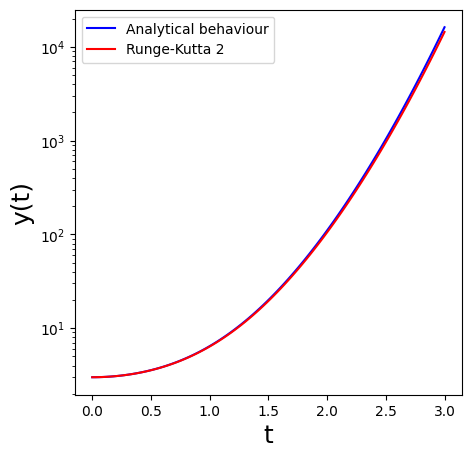

In [ ]:
#number of hs
N = 100
t = np.linspace(0,3,N)
h = 3/N
#yinitial
y=[3,]
for i in range(0,len(t)-1):
    y.append( RK2_step( lambda t,y: 2*t*(y-1), y[i], t[i], h ) )

y = np.array(y)

plt.figure(figsize=(5, 5))
plt.semilogy(t,2*np.exp(t**2)+1,'b-',label='Analytical behaviour')
plt.plot(t,y,'r-',label='Runge-Kutta 2')
plt.xlabel( "t", fontsize = 18 )
plt.ylabel( "y(t)", fontsize = 18 )
plt.legend(loc='best')
#plt.grid(1)
plt.show()

#Example 3

In this example we are going to use the Runge-Kutta 2 method (Modified Euler's) for describe the pendulum.

The equations of the pendulum are given by:

$$ \theta' = \omega $$
$$ \omega' = -\frac{g}{l}\sin(\theta) $$

what means that we have two wquation of firts order (trick).

Notice that it is not a MAS. However, for $\theta <<1$ rad, $\sin(\theta)\approx \theta$. Therefore, it is a M.A.S. and:

$$ \theta' = \omega $$
$$ \omega' \approx -\frac{g}{l}\theta $$

In [ ]:
#Example: pendulum
#Gravity
g = 9.8
#Pendulum's lenght and amplitude
l = 1.0
theta0= 10*np.pi/180 #in rad

w0 = np.sqrt(g/l)
p = 2*np.pi/w0
print('Theta0=', theta0)
print('Frecuencia natural w =',w0,'(rad/s)')
print('p =',np.round(2*np.pi/w0,2),'(s)')

#========================================================
#Dynamical function of the system
#========================================================
def function( t, y ):
    #Using the convention y = [theta, omega]
    theta = y[0]
    omega = y[1]
    #Derivatives
    dtheta = omega
    domega = -g/l*np.sin(theta)
    return np.array([dtheta, domega])

#RK2's Algoritmo
N = 50
tiempos = np.linspace(0,p,N)
h = p/N

Theta0= 0.17453292519943295
Frecuencia natural w = 3.1304951684997055 (rad/s)
p = 2.01 (s)


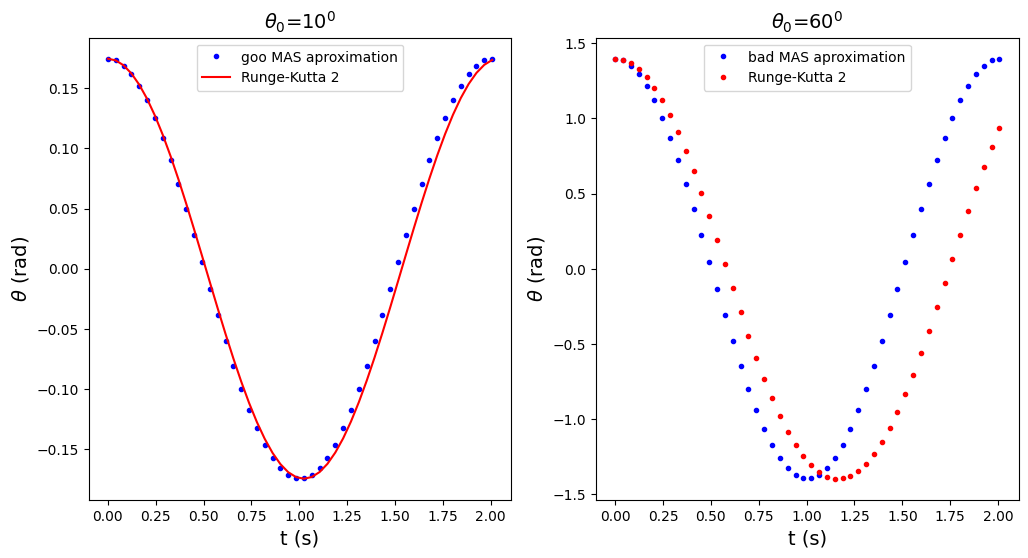

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

#Initial conditions
theta0 = 10*np.pi/180 #in rad
theta = [theta0,]
omega = [0,]

for i in range(0,len(tiempos)-1):
    t = tiempos[i]

    #Building current condition
    y = [theta[i], omega[i]]
    #Integrating the system
    thetai, omegai = RK2_step( function, y, t, h )

    #Appending new components
    theta.append( thetai )
    omega.append( omegai )

omega = np.array(omega)
theta = np.array(theta)
ax1.plot(tiempos, theta0*np.cos(w0*tiempos),'b.',label='goo MAS aproximation')
ax1.plot(tiempos, theta,'r-',label='Runge-Kutta 2')
#label
ax1.set_title('$\\theta_0$=60 rad', fontsize = 14)
ax1.set_xlabel( "t (s)", fontsize = 14 )
ax1.set_ylabel( '$\\theta$ (rad)', fontsize = 14 )
ax1.set_title('$\\theta_0$=10$^0$', fontsize = 14)
ax1.legend(loc='best')

#Initial conditions
theta0 = 80*np.pi/180 #in rad
theta = [theta0,]
omega = [0,]

for i in range(0,len(tiempos)-1):
    t = tiempos[i]

    #Building current condition
    y = [theta[i], omega[i]]
    #Integrating the system
    thetai, omegai = RK2_step( function, y, t, h )

    #Appending new components
    theta.append( thetai )
    omega.append( omegai )

omega = np.array(omega)
theta = np.array(theta)
#Plot
ax2.plot(tiempos, theta0*np.cos(w0*tiempos),'b.',label='bad MAS aproximation')
ax2.plot(tiempos, theta,'r.',label='Runge-Kutta 2')
#labels
ax2.set_title('$\\theta_0$=60$^0$', fontsize = 14)
ax2.set_xlabel( "t (s)", fontsize = 14 )
ax2.set_ylabel( '$\\theta$ (rad)', fontsize = 14 )
ax2.legend(loc='best')


##Example 4

In this example we are going to use the Runge-Kutta 2 method (Modified Euler's) for mapping the phase space of a pendulum.

The equations of the pendulum are given by:

$$ \theta' = \omega $$
$$ \omega' = -\frac{g}{l}\sin(\theta) $$

The phase space of a dynamical system is a space in which all the possible states of that system are univocally represented. For the case of the pendulum, a complete state of the system is given by the set $(\theta, \omega)$, so its phase space is two-dimensional. In order to explore all the possible states, we are going to generate a set of initial conditions and integrate them.

In [ ]:
#========================================================
#Defining parameters
#========================================================
#Gravity
g = 9.8
#Pendulum's lenght
l = 1.0

#Number of initial conditions
Nic = 30
#Maxim angular velocity
omega_max = 8

#Maxim time of integration
tmax = 6*np.pi
#Timestep
h = 0.01

#========================================================
#Dynamical function of the system
#========================================================
def function( t, y ):
    #Using the convention y = [theta, omega]
    theta = y[0]
    omega = y[1]
    #Derivatives
    dtheta = omega
    domega = -g/l*np.sin(theta)
    return np.array([dtheta, domega])

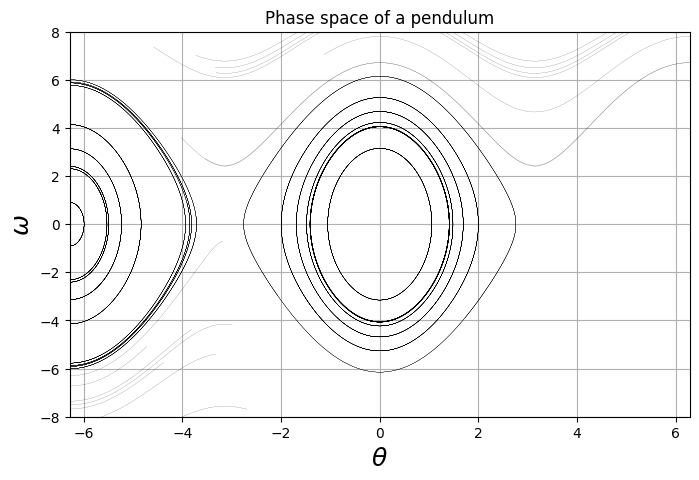

In [ ]:
#========================================================
#Generating set of initial conditions
#========================================================
#theta0s = -4*np.pi + np.random.random(Nic)*8*np.pi
#omega0s = -omega_max + np.random.random(Nic)*2*omega_max
theta0s = -2*np.pi + np.random.random(Nic)*2*np.pi
omega0s = -omega_max + np.random.random(Nic)*2*omega_max

#========================================================
#Integrating and plotting the solution for each IC
#========================================================
#Setting figure
plt.figure( figsize = (8,5) )
for theta0, omega0 in zip(theta0s, omega0s):
    #Arrays for solutions
    time = [0,]
    theta = [theta0,]
    omega = [omega0,]
    for i, t in zip(range(int(tmax/h)), np.arange( 0, tmax, h )):
        #Building current condition
        y = [theta[i], omega[i]]
        #Integrating the system
        thetai, omegai = RK2_step( function, y, t, h )
        #Appending new components
        theta.append( thetai )
        omega.append( omegai )
        time.append( t )
    #Plotting solution
    plt.plot( theta, omega, lw = 0.1, color = "black" )

#Format of figure
plt.xlabel( "$\\theta$", fontsize = 18 )
plt.ylabel( "$\omega$", fontsize = 18 )
plt.xlim( (-2*np.pi, 2*np.pi) )
plt.ylim( (-omega_max, omega_max) )
plt.title( "Phase space of a pendulum" )
plt.grid(1)

with Nic=1000

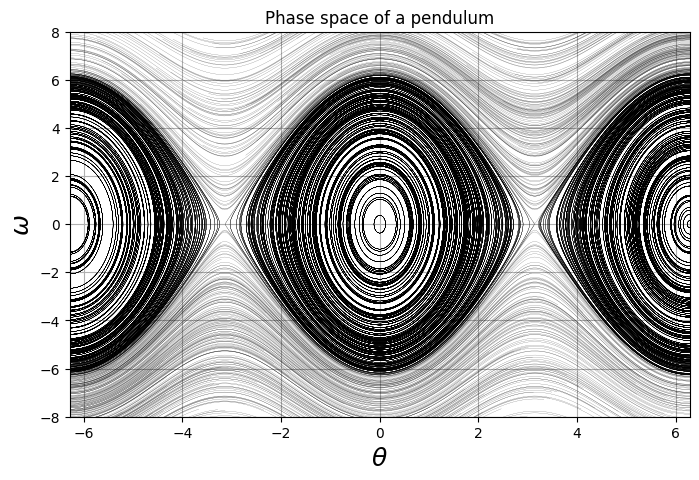

##<font color='red'>    
**Activity 3**
</font>


Using the previous example, explore the phase space of a simple oscillator and a damped pendulum.


##Fourth-order Runge-Kutta method

Finally, the most used general purpose method is the fourth-order Runge-Kutta scheme. Its derivation follows the same previous reasoning, however the procedure is rather long and it makes no sense to reprouce it here. Instead, we will give the direct algorithm:

Let's assume again a problem of the form:

$$ \frac{dy}{dt}=y'=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

The Runge-Kutta-4 (RK4) method allows us to predict the solution at the time $t+h$ as:

$$ y(t+h) = y(t) + \frac{1}{6}( \mathbf{K}_0 + 2\mathbf{K}_1 + 2\mathbf{K}_2 + \mathbf{K}_3  ) $$

where:

$$ \mathbf{K}_0 = hf(t,y)$$
$$ \mathbf{K}_1 = hf\left( t + \frac{h}{2},y + \frac{\mathbf{K}_0}{2}\right)$$
$$ \mathbf{K}_2 = hf\left( t + \frac{h}{2},y + \frac{\mathbf{K}_1}{2}\right)$$
$$ \mathbf{K}_3 = hf\left( t + h,y + \mathbf{K}_2\right)$$

##<font color='red'>    
**Activity 4** </font>

Implement the Runge Kutta 4.

Let's consider the function $$y(t)=2e^{t^2}+1$$

It fulfill $dy/dt=f(t,y)=2 t (y-1)$ with $y(0)=3$ in $0<t<3$.

Lets apply the Runge-Kutta 4 method for this simple case.

##<font color='red'>    
**Activity 5** </font>
Un tanque esférico de radio R está
inicialmente lleno de agua. En el fondo del tanque hay un agujero de radio r, por el cual escapa el
agua bajo la influencia de la gravedad. La ecuación diferencial que expresa la profundidad del agua
como función del tiempo es:

$$dy/dt=-\dfrac{r^2\sqrt{2g}}{2R\sqrt{y}-\sqrt{y^3}}$$

donde $g = 32.2 ft/s^2$, R = 12 ft, r = 1/8 ft. La condición inicial es que en t = 0, y = 22. Encontrar la altura del agua al minuto 1000.


Respuesta: La altura del agua es de 16.099 m.

see pag. 223 of
https://librosoa.unam.mx/bitstream/handle/123456789/3416/MNPython.pdf?sequence=1&isAllowed=y

##<font color='red'>    
**Activity 5** (optional project)</font>
   
The **Lorenz attractor** is a common set of differential equations of some models of terrestrial atmosphere studies. It is historically known as one of the first system to exhibit deterministic caos. The equations are:

$$ \frac{dx}{dt} = a(y-x) $$
$$ \frac{dy}{dt} = x(b-z)-y $$
$$ \frac{dz}{dt} = xy-cz $$

with $a = 10$, $b=28$ and $c = 8/3$ the solution shows periodic orbits.

<font color='red'>    
Write a routine that gives a step of RK4 and integrate the previous system. Plot the resulting 3D solution $(x,y,z)$.
</font>

- - -

#Two-Point Boundary Value Problems

Up to now we have solved initial value problems of the form:

$$ \frac{dy}{dt}=y'=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha $$

Second order equations can be similarly planted as

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y'(a) = u $$

This type of systems can be readily solved by defining the auxiliar variable $w = y'$, turning it into a first order system of equations.

Now, we shall solve two-point boundary problem, where we have two conditions on the solution $y(t)$ instead of having the function and its derivative at some initial point, i.e.

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y(b) = \beta $$

In spite of its similar form to the initial value problem, two-point boundary problems pose a increased difficulty for numerical methods. The main reason of this is the iterative procedure performed by numerical approaches, where from an initial point, further points are found. Trying to fit two different values at different points implies then a continuous readjusting of the solution.



A common way to solve these problems is by turning them into a initial-value problem

$$ \frac{d^2y}{dt^2}=y''=f(t,y,y'),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha \ \ \ y'(a) = u $$

Let's suppose some choice of $u$, integrating by using some of the previous methods, we obtain the final boundary condition $y(b)=\theta$. If the produced value is not the one we wanted from our initial problem, we try another value $u$. This can be repeated until we get a reasonable approach to $y(b)=\beta$. This method works fine, but it is so expensive and terribly inefficient.

Note when we change $u$, the final boundary value also change, so we can assume $y(b) = \theta$. The solution to the problem can be thought then as a root-finding problem:

$$ y(b) = \theta(u) = \beta $$

or

$ r(u) \equiv \theta(u) - \beta = 0 $

where $r(u)$ is the residual function. This problem can be thus solved using some of the methods previously seen for the root-finding problem.

##Example 3 (optional)

A very simplified model of interior solid planets consists of a set of spherically symmetric radial layers, where the next properties are computed: density $\rho(r)$, enclosed mass $m(r)$, gravity $g(r)$ and pressure $P(r)$. Each of these properties are assumed to be only radially dependent. The set of equations that rules the planetary interior is:

**Hydrostatic equilibrium equation**

$$\frac{dP}{dr} = -\rho(r)g(r)$$

**Adams-Williamson equation**

$$\frac{dg}{dr} = 4\pi G\rho(r) - \frac{2Gm(r)}{r^3}$$

**Continuity equation**

$$\frac{dm}{dr} = 4\pi r^2 \rho(r)$$

**Equation of state**

$$\frac{d\rho}{dr} = -\frac{\rho(r)^2g(r)}{K_s}$$

For accurate results the term $K_s$, called the adiabatic bulk modulus, is temperature and radii dependent. However, for the sake of simplicity we shall assume a constant value.

Solving simultaneously the previous set of equations, we can find the complete internal structure of a planet.



We have four functions to be determined and four equations, so the problem is solvable. It is only necessary to provide a set of boundary conditions of the form:

$$ \rho(R) = \rho_{surf},\ \ \ m(R) = M_p, \ \ \ g(R) = g_{surf},\ \ \ P(R) = P_{atm} $$

where $R$ is the planetary radius, $\rho_{surf}$ the surface density, $M_p$ the mass of the planet, $g_{surf}$ the surface gravity and $P_{atm}$ the atmospheric pressure. However, there is a problem, we do not know the planetary radius $R$, so an extra condition is required to determine this value. This is reached through the physical condition $m(0) = 0$, this is, the enclosed mass at a radius $r = 0$ (center of the planet) must be 0.


The two-value boundary nature of this problem lies then in fitting the mass function at $m(R) = M_p$ and at $m(0) = 0$. To do so, let's call the residual mass $m(0) = M_r$. This value should depend on the chosen radius $R$, so a large value would imply a mass defect $M_r(R)<0$, and a small value a mass excess $M_r(0)>0$. The problem is then solving the radius $R$ for which $m(0) = M_r(R) = 0$. This can be done by using the bisection method.


For this problem, we are going to assume an one-layer planet made of perovskite, so $K_s \approx 200\ GPa$. A planet mass equal to earth, so $M_p = 5.97219 \times 10^{24}\ kg$, a surface density $\rho_{surf} = 3500\ kg/m^3$ and a atmospheric pressure of $P_{atm} = 1\ atm = 1\times 10^5\ Pa$.

#Using Scipy

##Solving Ordinary Differential Equations (ODEs)

To solve an ordinary differential equation of the type $$dy/dt(t)=f(t)$$

with a given $$y(t_0)=y_0$$, we can use scipy's solve_ivp function.
Here is a (self explaining) example program (usesolve_ivp.py) to find

$y(t)$ for $t\,\epsilon\, [0,2]$
given this differential equation: $$dy/dt(t)=-2yt$$ with $y(0)=1$

See https://fangohr.github.io/introduction-to-python-for-computational-science-and-engineering/16-scipy.html
for solving EDO with Scipy

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


https://fangohr.github.io/introduction-to-python-for-computational-science-and-engineering/16-scipy.html

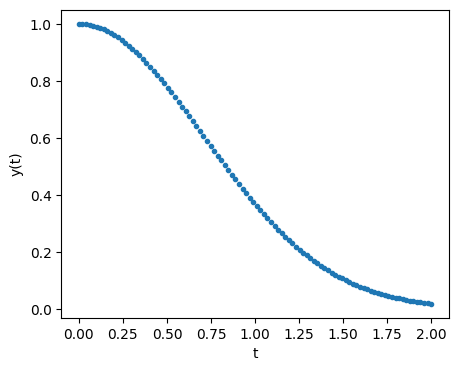

In [ ]:
#Example: https://fangohr.github.io/introduction-to-python-for-computational-science-and-engineering/16-scipy.html
def f(t, y):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = [1]           # initial value y0=y(t0)
t0 = 0             # integration limits for t: start at t0=0
tf = 2             # and finish at tf=2

#sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0)  # computation of Solution
#sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, atol=1e-8, rtol=1e-8)
ts = np.linspace(t0, tf, 100)  # 100 points between t0 and tf
sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, t_eval=ts)

plt.figure(figsize=(5, 4))
plt.plot(sol.t, sol.y[0], '.')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

- - -